In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


**introduction**

* before begining analysis of data we should first understand the data and the problem 
we should solve.

* after that we ask our selves questions about the relationships between the features on 
data and how we got the useful answer from this data to our questions?

* we should know all features in data 

* after that we convert these questions a code and extract insights which solve the problem

**problem statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**attrebutes**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**

Need to perform clustering to summarize customer segments.

*let’s go

**read data**

In [3]:
df=pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep='\t')
             
df.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0


**explore data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

* the two columns (Z_CostContact , Z-revenue ) contain a single value so they are
probably useless for model ,we shold drop them

In [6]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1 , inplace=True)

**preprocessing and data cleaning**

In [7]:
# null values
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
MntGoldProds            0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
NumDealsPurchases       0
MntSweetProducts        0
Year_Birth              0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [8]:
df.dropna(inplace=True)  #delete nulls
df.shape

(2216, 27)

In [9]:
#numerical columns
num_col=[col for col in df.columns if type(col)!='object']
num_col

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [10]:
#delete Year_Birth and Dt_Customer as they not important in data
#df.drop(['Dt_Customer','Year_Birth'],axis=1,inplace=True)
#df.shape

In [11]:
# explore marital status
df['Marital_Status'].value_counts(ascending=False)

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

**feature engineering**

There is a lot of information given in the dataset related to the customers. In some cases we can group some columns together to create new features and in some cases we can create new columns based on the existing one's to create new features. This would help to better explore the data and draw meaningful insights from it.

**Creating the "Age", "Money_Spent", "PurchaseNum", "Children" and "Marital_Status" out of existing columns.**

<Axes: ylabel='count'>

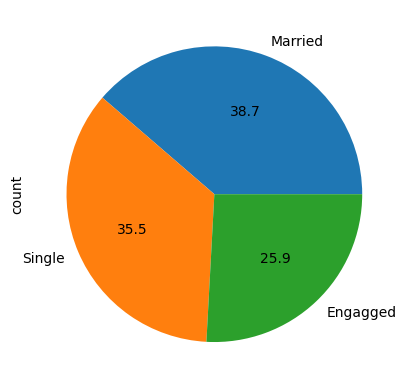

In [12]:
#rename categories to (married , engaged and single)
df['Marital_Status']=df['Marital_Status'].replace({'Together':'Engagged','Divorced':'Single',
                    'Widow':'Single','Alone':'Single' , 'Absurd':'Single' ,'YOLO':'Single'})

df['Marital_Status'].value_counts(ascending=False).plot(kind='pie',autopct='%1.1f')

In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [14]:
#make a new column for money spent

df["Money_Spent"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])

#make new column for purchases
df["PurchaseNum"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

#make new column for children collect kids and teenhome 
df['children']=df['Kidhome']+df['Teenhome']

#make a new column for age 
df['Age']=2023 - df['Year_Birth']
#make new column for accept camps 
df['accept_camp']=(df['AcceptedCmp1'] +df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']
                   +df['AcceptedCmp5'])

df.shape

(2216, 32)

**drop redundant columns from data**

In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Money_Spent', 'PurchaseNum',
       'children', 'Age', 'accept_camp'],
      dtype='object')

In [16]:
#delete redundant variables

df.drop(['ID','Year_Birth','Kidhome','Teenhome','Dt_Customer',
        'NumCatalogPurchases','NumWebPurchases','NumStorePurchases',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2','Complain','Response','NumWebVisitsMonth'],axis =1 ,inplace=True)
df.shape

(2216, 16)

<Axes: ylabel='count'>

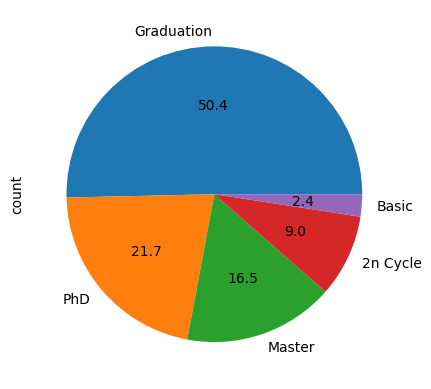

In [17]:
#Education
df['Education'].value_counts(ascending=False).plot(kind='pie',autopct='%1.1f')


In [18]:
#relation between gold and marital status
relation=df[['Marital_Status','Income','MntGoldProds']].sort_values(by='MntGoldProds', ascending=False).head(15)
relation.style.background_gradient(cmap='coolwarm')

,Marital_Status,Income,MntGoldProds
1975,Married,4428.000000,321
1806,Single,7144.000000,291
1328,Single,6560.000000,262
723,Married,72190.000000,249
2173,Married,71965.000000,248
2235,Married,61223.000000,247
1421,Single,65704.000000,246
2093,Single,79244.000000,245
702,Single,71022.000000,242
895,Single,55260.000000,242


* it’s noted that all grups buy the gold , whether middle income , rich or poor as well as 
married or single

In [19]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Money_Spent,PurchaseNum,children,Age,accept_camp
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,607.075361,12.557310,0.947202,54.179603,0.298285
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,602.900476,7.204611,0.749062,11.985554,0.679209
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,27.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,69.000000,6.000000,0.000000,46.000000,0.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,396.500000,12.000000,1.000000,53.000000,0.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,1048.000000,18.000000,1.000000,64.000000,0.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,2525.000000,32.000000,3.000000,130.000000,4.000000


**remove outliers**
* There seems to be some outliers in the Age and Income columns. Let's check them.



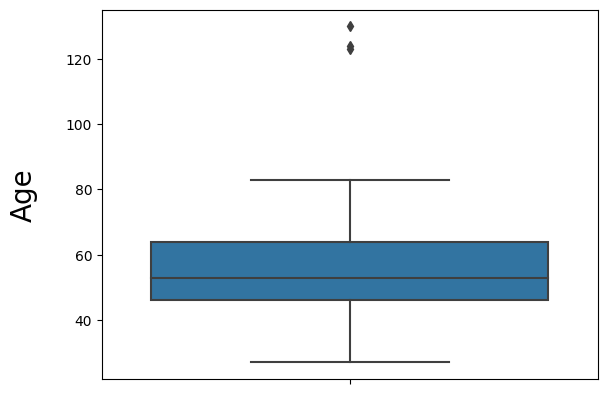

In [20]:
#plt.figure(figsize=(10,10))
sns.boxplot(y=df.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);


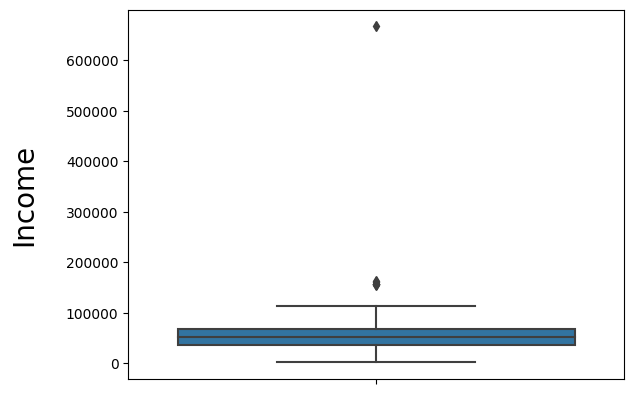

In [21]:
#outlyer in income 
#plt.figure(figsize=(20,10))
sns.boxplot(y=df.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);

**insights**

* there  are some customers aged above 100. This is unlikely to happen. Let's drop those customers from data.


* There are some customers who are earning more than 120,000 and some of them even more than 600,000. They are clearly the outliers in the data, so we will leave them out

In [22]:
df=df[df.Age< 100]
df=df[df.Income<120000]

In [23]:
#rename the columns 
df.columns=['Education','Marital_Status','Income','Recency','wines','fruits','meat','fish',
            'sweet','gold','Deals','Money_Spent',
            'PurchaseNum','children','Age','accept_camp']

In [24]:
df.head()

,Education,Marital_Status,Income,Recency,wines,fruits,meat,fish,sweet,gold,Deals,Money_Spent,PurchaseNum,children,Age,accept_camp
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,1617,22,0,66,0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,27,4,2,69,0
2,Graduation,Engagged,71613.0,26,426,49,127,111,21,42,1,776,20,0,58,0
3,Graduation,Engagged,26646.0,26,11,4,20,10,3,5,2,53,6,1,39,0
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,422,14,1,42,0


**Exploratory data analysis**

In [25]:
#correlation map for products 
products=df[['wines','fruits','meat','fish','sweet','gold','Money_Spent'
           ,'PurchaseNum','Income']]

<Axes: >

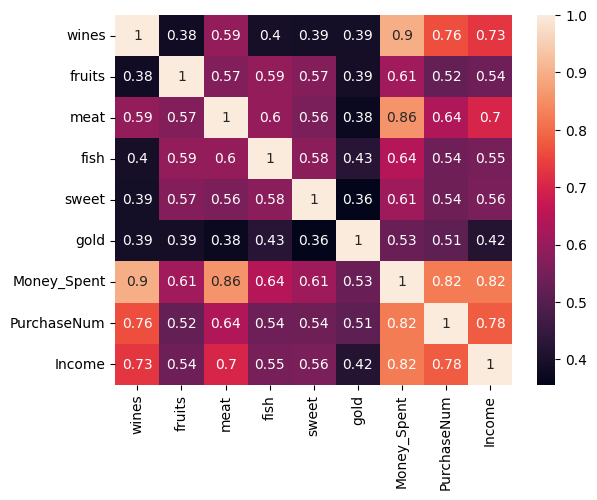

In [26]:
sns.heatmap(products.corr(),annot=True)

* we can deduce that wines is the top in money spent after it the meat .
* they are followed by fish with 64%  
* then sweet and fruits are equal with 61%
* and finally the gold with 53% .

Text(0.5, 1.0, 'Age distribution')

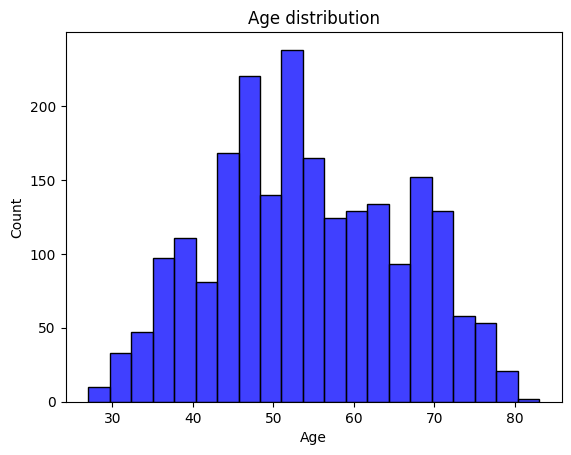

In [27]:
#age distribution

sns.histplot(data=df.Age , color='blue')
plt.title('Age distribution')


Text(0.5, 1.0, 'income distribution')

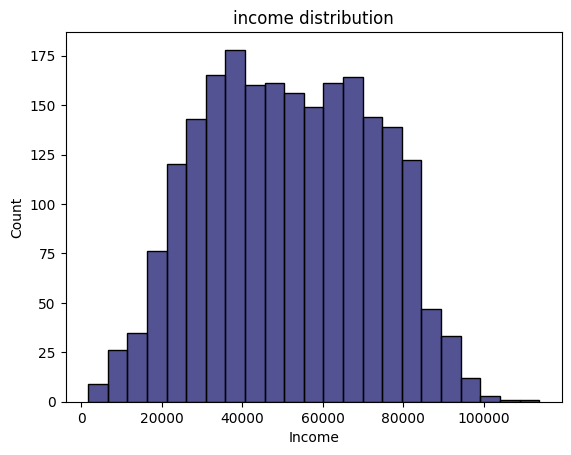

In [28]:
#range income 
sns.histplot(data=df.Income , color="midnightblue")
plt.title('income distribution')

* range income of customers from 30000 to 80000

Text(0.5, 1.0, 'income vs money spent')

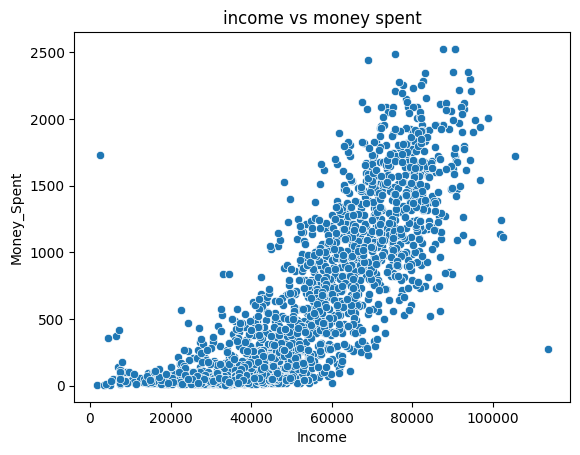

In [29]:
#income vs money spent
sns.scatterplot(x=df.Income ,y=df.Money_Spent)
plt.xlabel='income'
plt.ylabel='money spent'
plt.title('income vs money spent')

* this  also confirms the correlation map above the relation between them was 82% which tend to a linear relation. 

Text(0.5, 1.0, 'average spending on products')

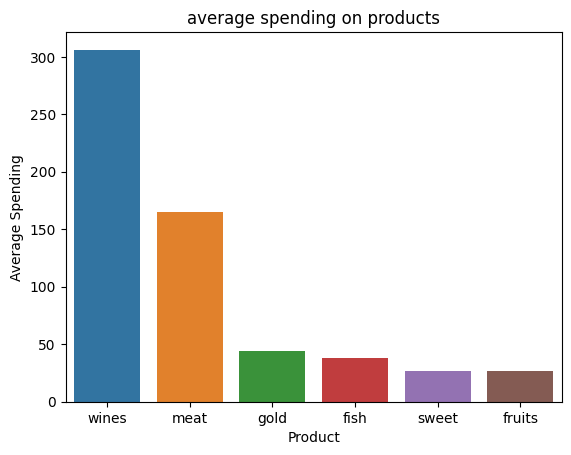

In [30]:
# average spending on products
products=df[['wines','fruits','meat','fish','sweet','gold']]
product_means=products.mean(axis=0)
#sns.barplot(x='product_means' ,y='Money_Spent')

product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()),
                                columns=['Product', 'Average Spending'])
sns.barplot(data=product_means_df, x='Product', y='Average Spending')
plt.title('average spending on products')



#product_means = products.mean(axis=0).sort_values(ascending=False)


* we deduce that:

Wine and Meats products are the most famous products among the customers

Sweets and Fruits are not being purchased often

**kmeans model**

In [31]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'wines', 'fruits',
       'meat', 'fish', 'sweet', 'gold', 'Deals', 'Money_Spent', 'PurchaseNum',
       'children', 'Age', 'accept_camp'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

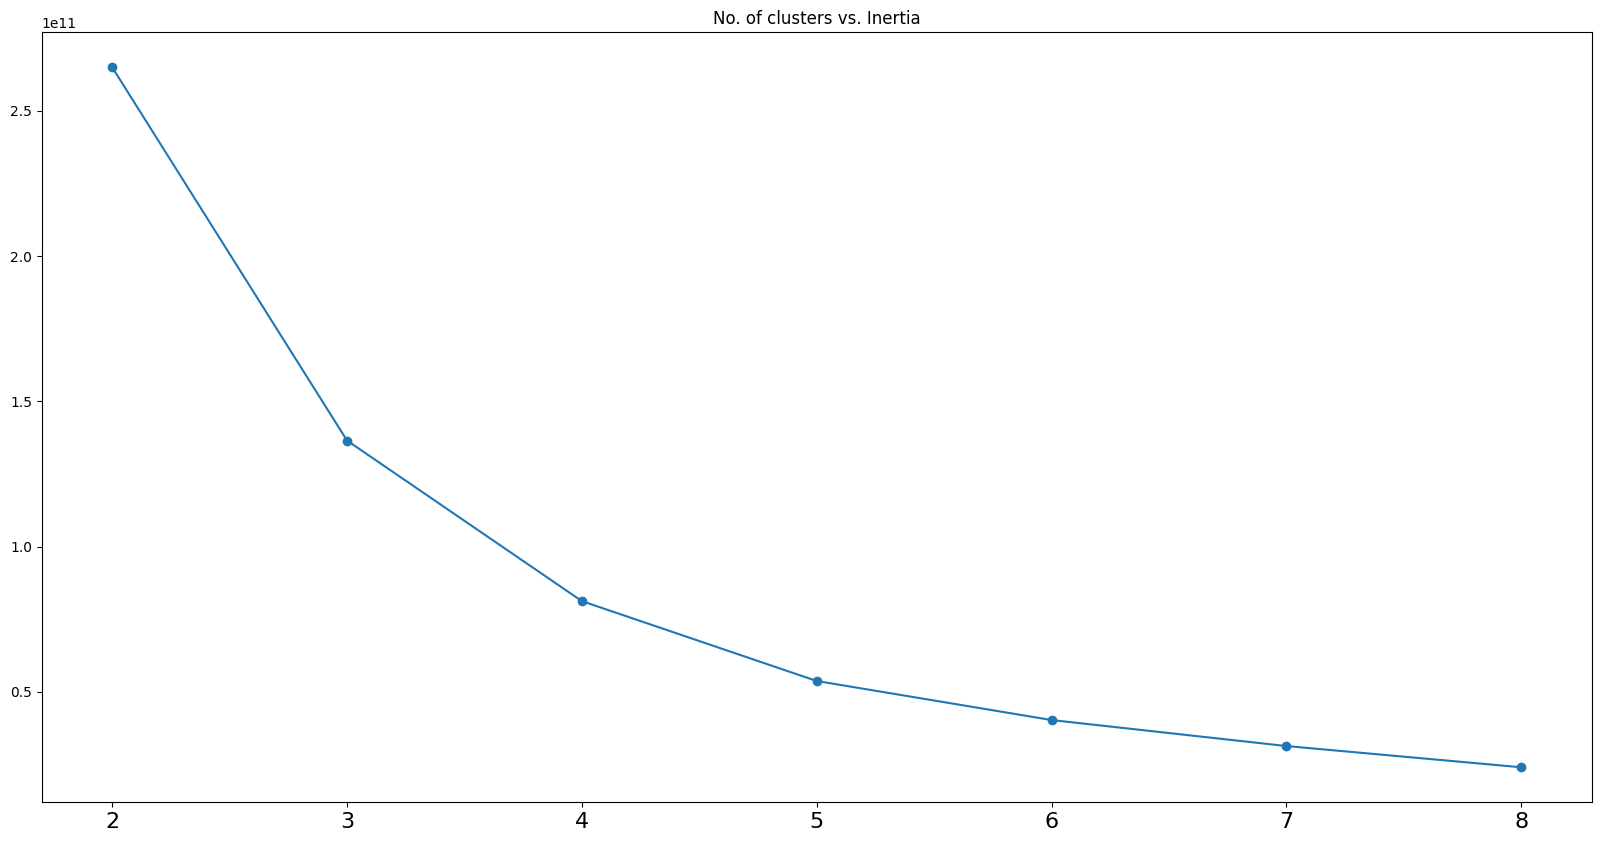

In [32]:
from sklearn.cluster import KMeans
x=df.drop(['Education','Marital_Status'], axis=1)
options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(x)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)

* Based on the above plot we will segment the customers into 4 clusters, as the inertia value donot decrase much after 4 clusters

In [33]:
model=KMeans(n_clusters=4, init='k-means++',random_state=42)
model.fit(x)
preds=model.predict(x)
customer_kmeans=x.copy()
customer_kmeans['clusters']=preds

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**clusters identification**
* Let's try to identify the modelled 4 clusters from different features of the data

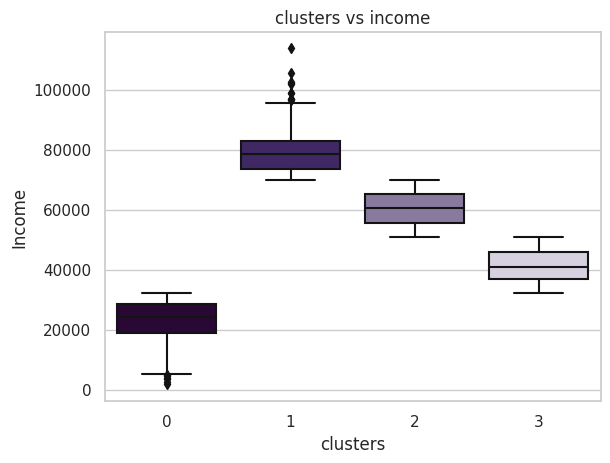

In [34]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

#plt.figure(figsize=(20,10))
sns.boxplot(data=customer_kmeans , x='clusters' , y='Income', palette=pal)
plt.title('clusters vs income')
plt.show()

Text(0.5, 1.0, 'clusters vs money spent')

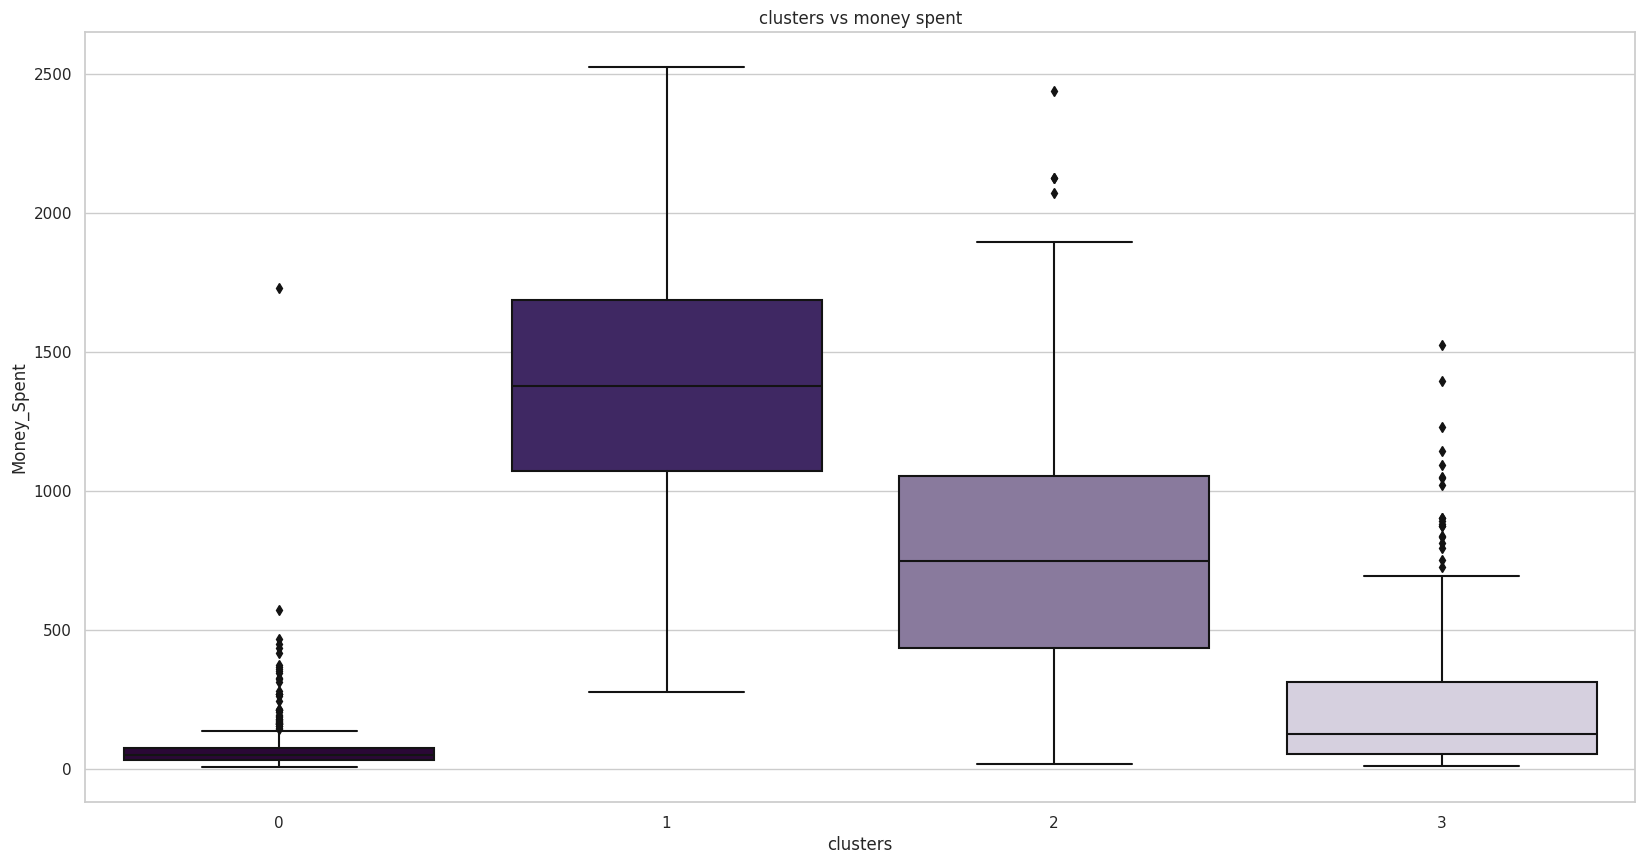

In [35]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(20,10))
sns.boxplot(data=customer_kmeans ,x='clusters' ,y='Money_Spent', palette=pal)
plt.title('clusters vs money spent')

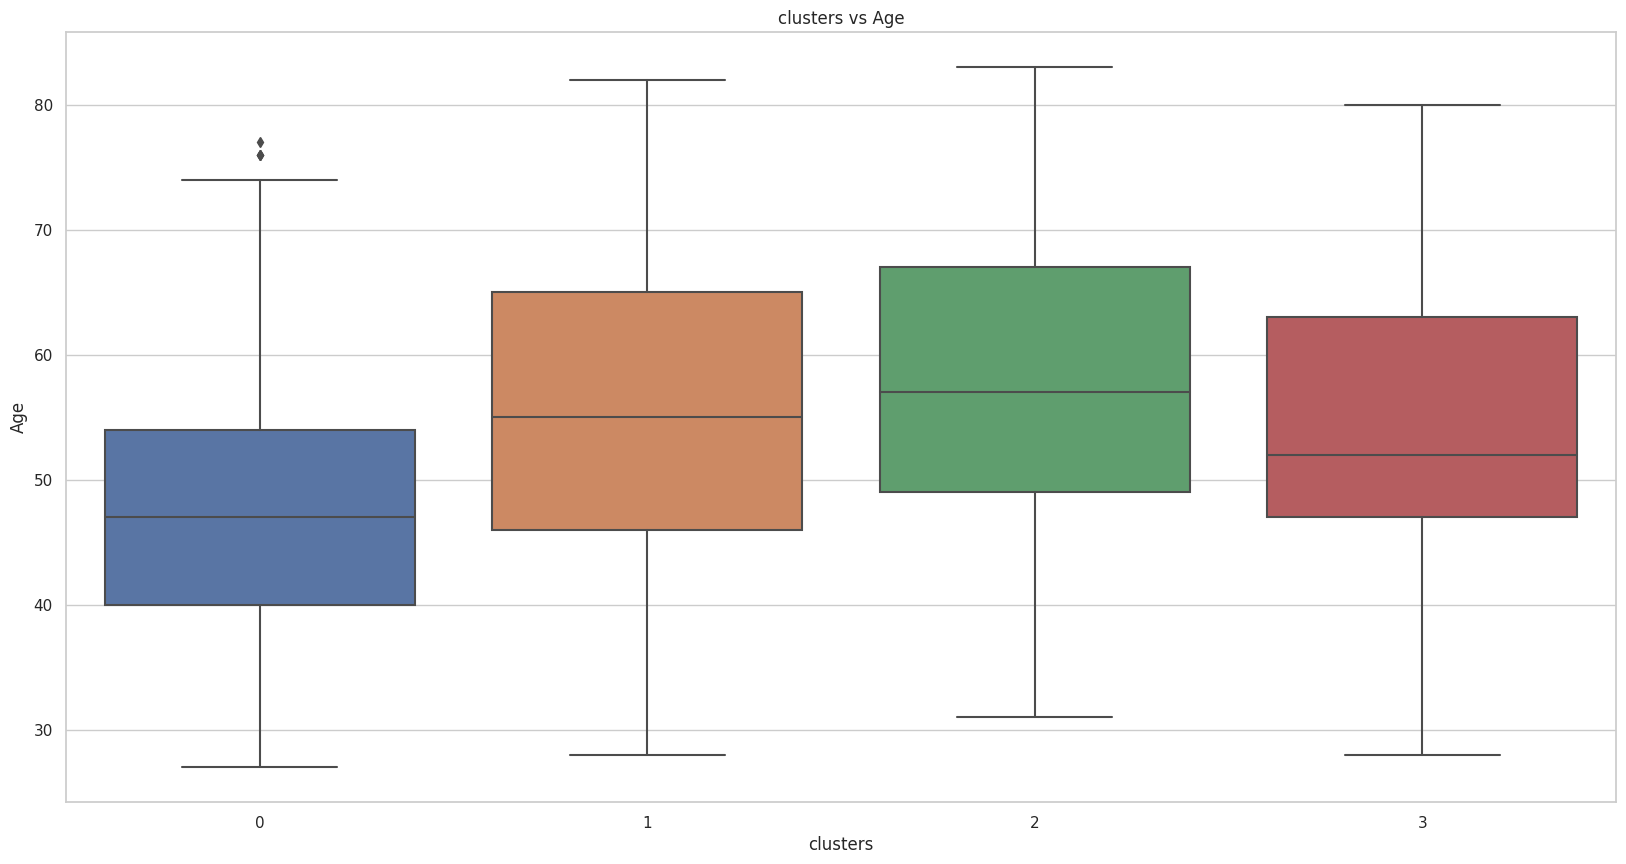

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age');
plt.title('clusters vs Age')
plt.show()

Text(0.5, 1.0, 'clusters vs children')

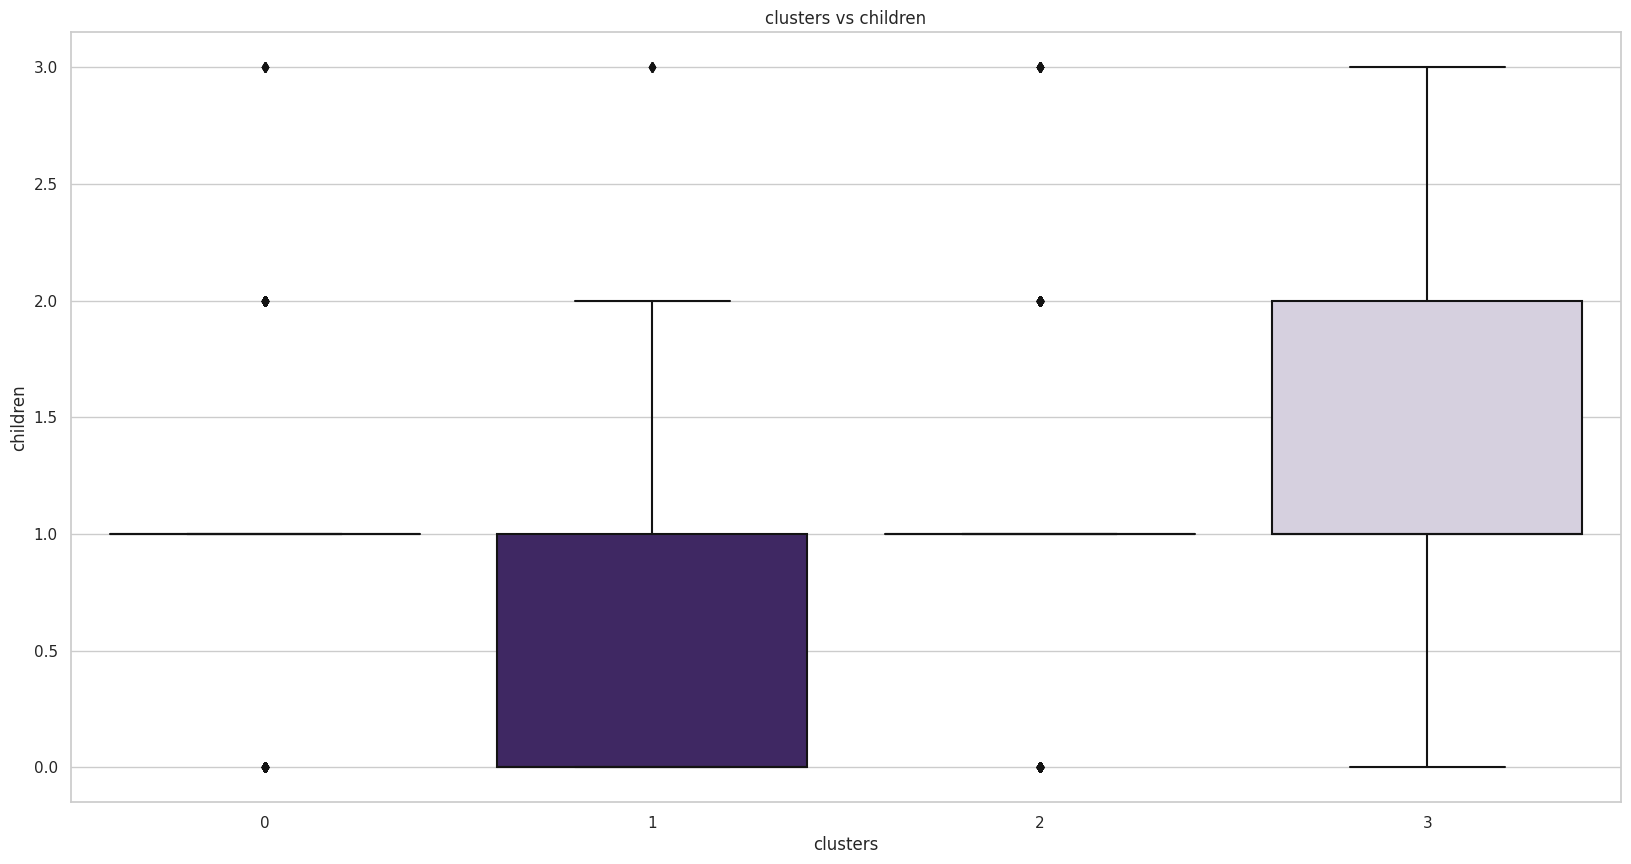

In [37]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(20,10))
sns.boxplot(data=customer_kmeans ,x='clusters' ,y='children', palette=pal)
plt.title('clusters vs children')

<Axes: xlabel='clusters', ylabel='PurchaseNum'>

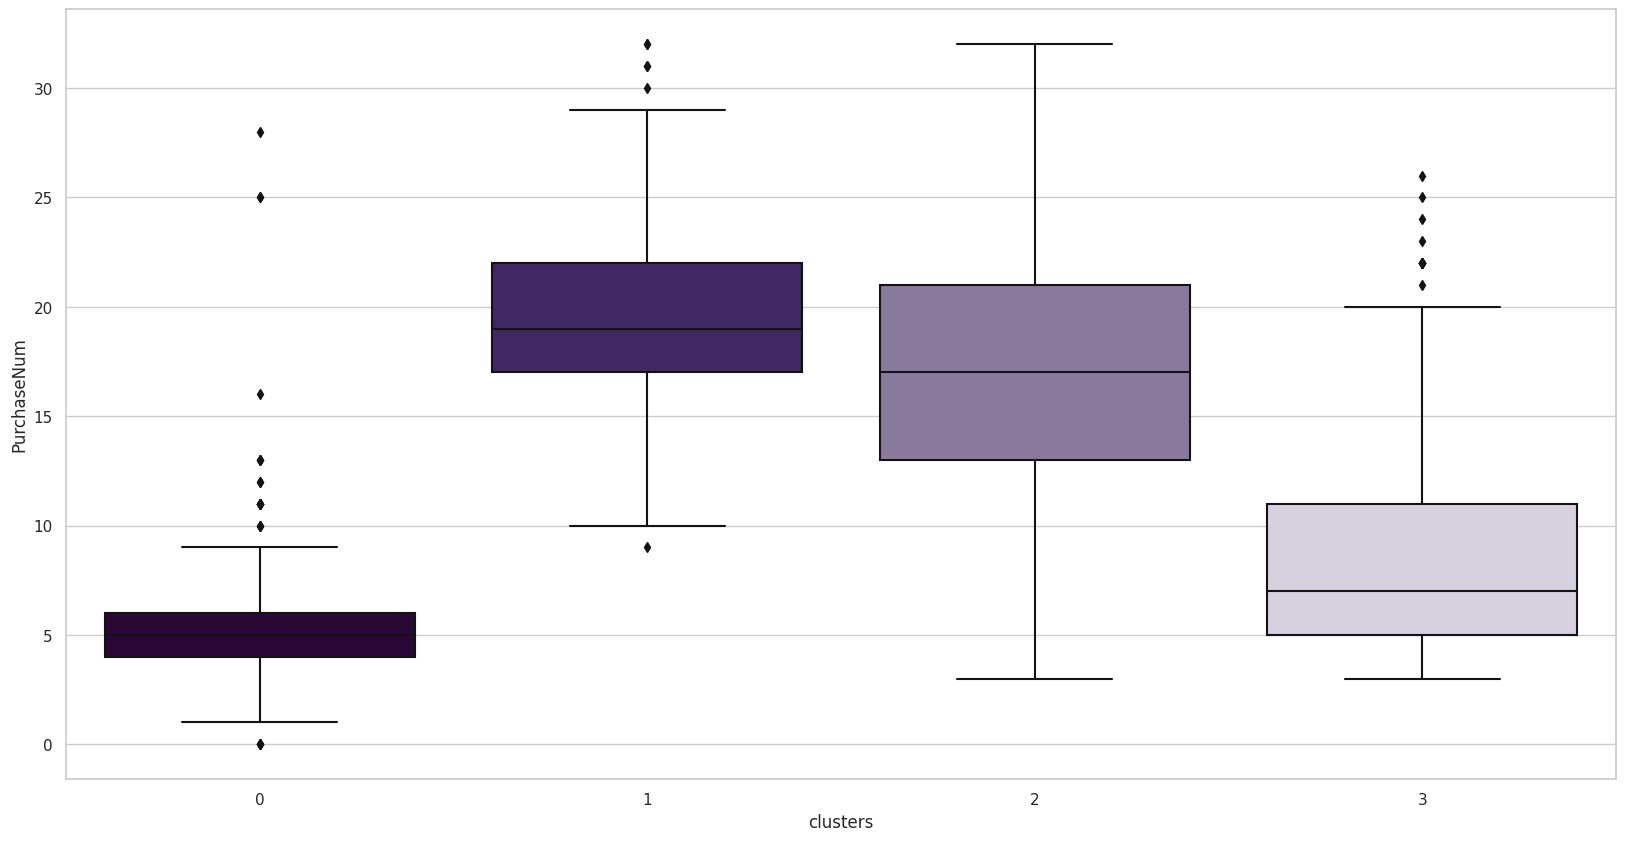

In [38]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(20,10))
sns.boxplot(data=customer_kmeans ,x='clusters' ,y='PurchaseNum' ,palette=pal)

<Axes: xlabel='clusters', ylabel='Recency'>

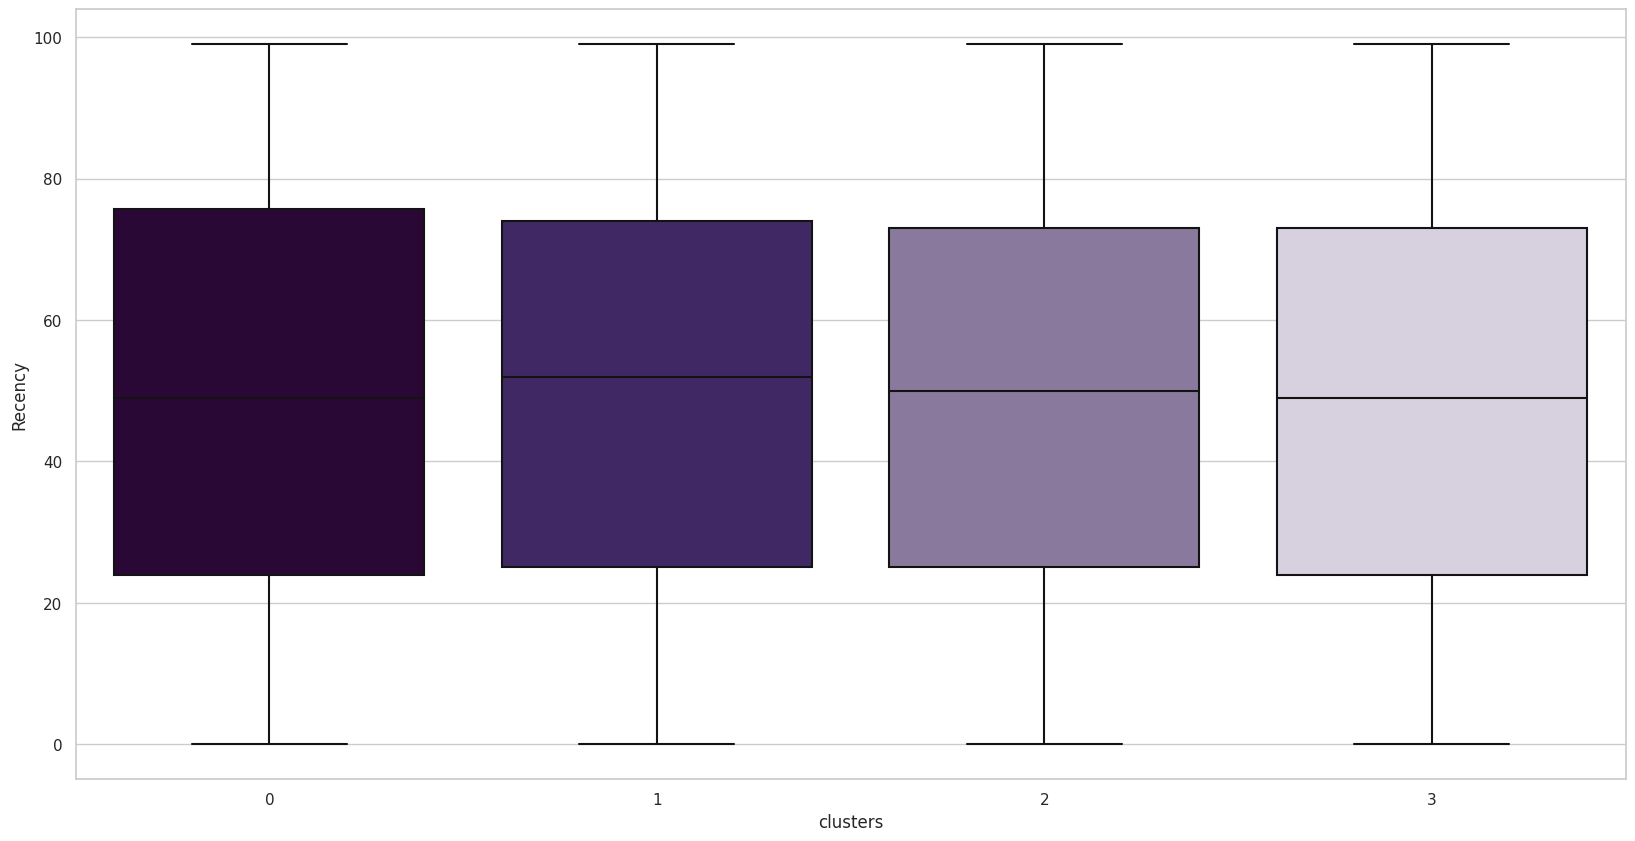

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(data=customer_kmeans ,x='clusters' ,y='Recency' ,palette=pal)

**Clusters Interpretation**

From the above analysis we can segment the customers into 4 groups based on their income and total spendings:

* cluster0 has the lowest income and the lowest money spent 
* cluster1 has the highst income and the highest money spent 
* cluster2 follows cluster1 in the second place(high income and high money spent)
* cluster3 follows cluster2 in the middle class middle income and middle money spent
* also each cluster made the purchases which appropriate them needs. 
 
 * so we can replace name of clusters to 'Bronze' , 'platinum' , 'Gold' ,'Silver'         respectively 
 

In [40]:
#clusters
#labels=['cluster0','cluster1','cluster2','cluster3']
#cluster0_num=df[df['cluster']]

In [41]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Platinum',
                                                             2: 'Gold',
                                                             3: 'Silver',
                                                             0: 'Bronze'})

df['clusters'] = customer_kmeans.clusters

In [42]:
cluster_counts = df.clusters.value_counts()

fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

**insights**

* most of customers in the silver and gold categories about silver 29.1% and gold 27.8 % 

* platinium is the third category with 22.9% and the bronze only 20% 

**relationship between income vs spent money**

TypeError: 'str' object is not callable

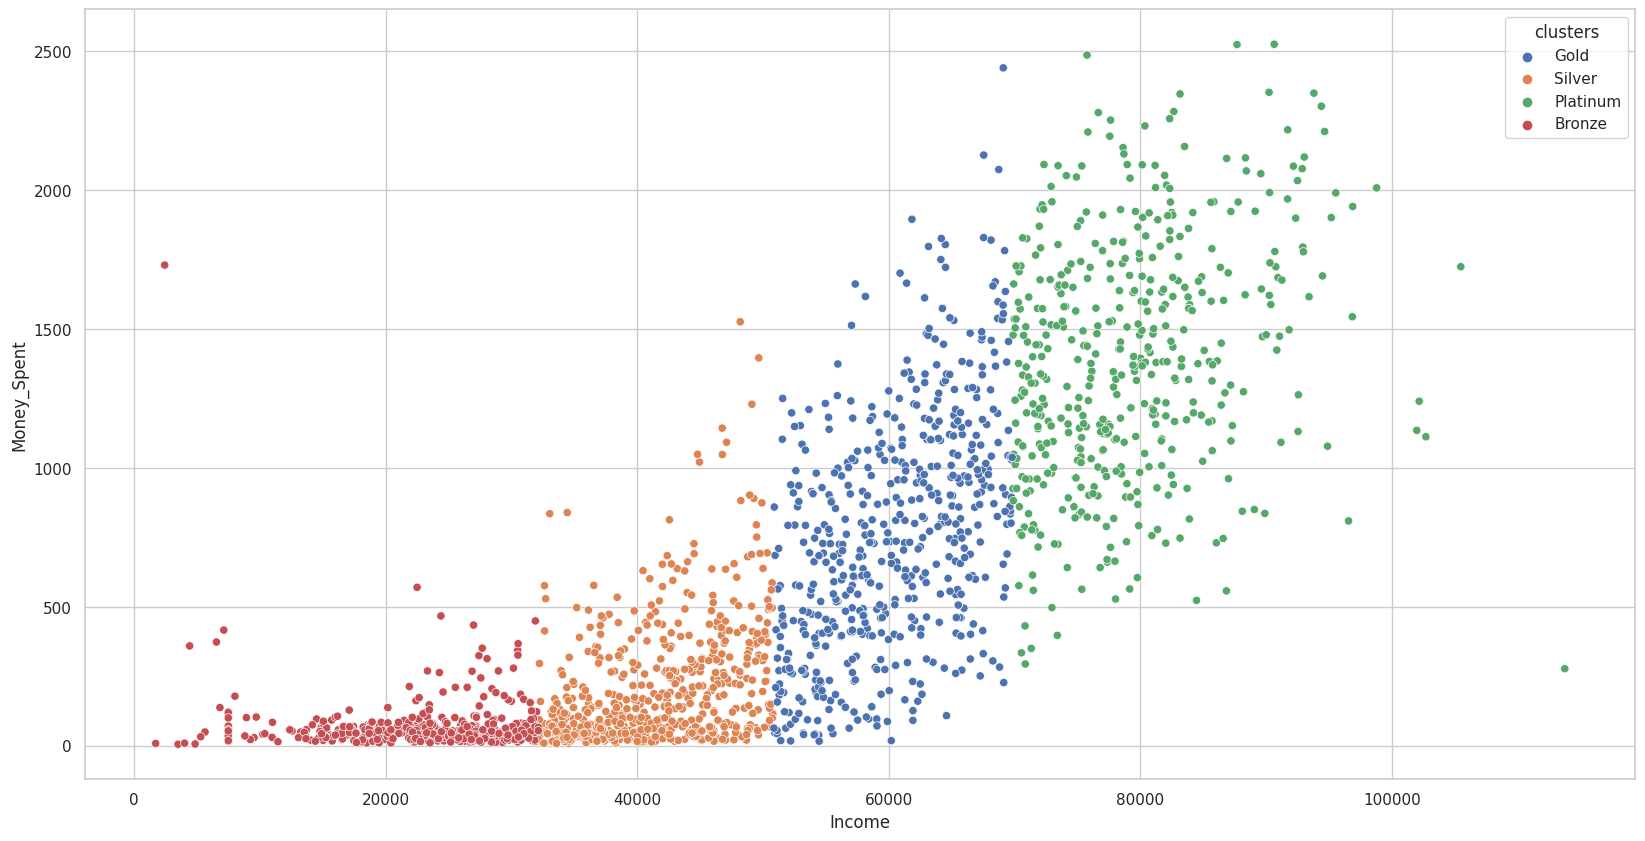

In [48]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df , x='Income',y='Money_Spent' , hue='clusters');
plt.xlabel('Income',fontsize=20,lapelpad=20)
plt.ylabel('money spent',fontsize=20,lapelpad=20)


**we notice that**

* each cluster spends according to his earning of money . 

* the more earns the more their spends 

**spending products by clusters**

In [49]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'wines', 'fruits',
       'meat', 'fish', 'sweet', 'gold', 'Deals', 'Money_Spent', 'PurchaseNum',
       'children', 'Age', 'accept_camp', 'clusters'],
      dtype='object')

TypeError: 'str' object is not callable

<Figure size 2000x1000 with 0 Axes>

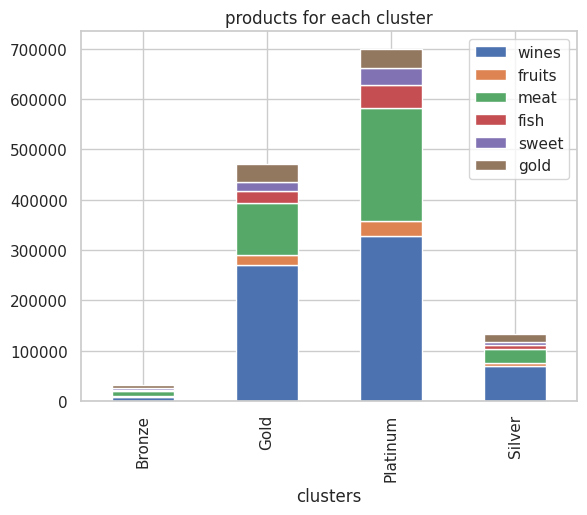

In [54]:
cluster_products=df.groupby('clusters')[['wines','fruits','meat','fish','sweet',
                                         'gold']].sum()
plt.figure(figsize=(20,10))
cluster_products.plot(kind='bar', stacked=True)
plt.title('products for each cluster')
plt.xlabel('clusters')
plt.ylabel('products spents')

plt.xticks(rotation=0,ha='center')

* wines occupies the highest possition among products

<Axes: xlabel='clusters', ylabel='accept_camp'>

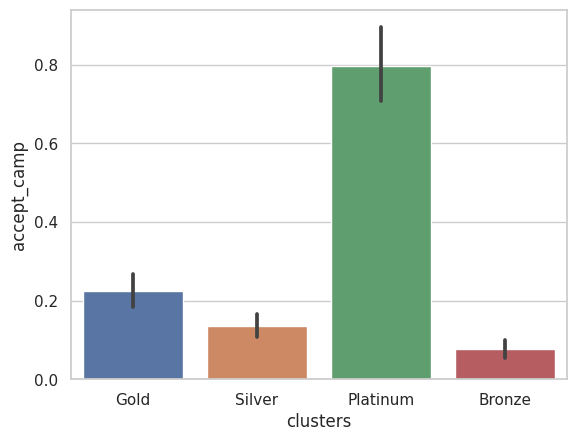

In [59]:
sns.barplot(data=df,x='clusters',y='accept_camp')


* platinium occpies the highest position

**conclusion**

* most of customers are university graduates
* most of customers are living with a partener
* the range of age among customers between 40 and 65 
* Most of the customers are earning between 25000 and 85000
* with more income the more spending money 


* On the basis of income and total spendings, customers are divided into 4 clusters i.e. Platinum, Gold, Silver and Bronze

* Most of the customers fall into the Silver and Gold categories

* wine and meat are most popular products among all clusters 
* Platinum customers showed more acceptance towards promotion campaigns while bronze customers the least interest

**if you found this useful or interesting, please don't forget to comment and upvote**

**Thank you!**